In [1]:
!pip install ortools


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import numpy as np
from ortools.linear_solver import pywraplp
from scipy.optimize import linprog
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
%matplotlib inline

/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20248 (\N{CJK UNIFIED IDEOGRAPH-4F18}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 35299 (\N{CJK UNIFIED IDEOGRAPH-89E3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


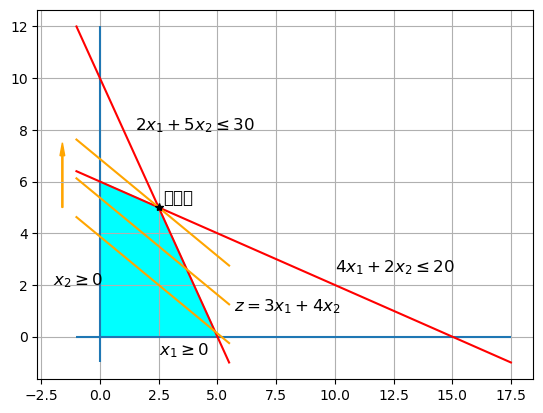

In [3]:
fig, ax = plt.subplots()
ax.grid()

# 绘制约束线
ax.hlines(0, -1, 17.5)
ax.vlines(0, -1, 12)
ax.plot(np.linspace(-1, 17.5, 100), 6-0.4*np.linspace(-1, 17.5, 100), color="r")
ax.plot(np.linspace(-1, 5.5, 100), 10-2*np.linspace(-1, 5.5, 100), color="r")
ax.text(1.5, 8, "$2x_1 + 5x_2 \leq 30$", size=12)
ax.text(10, 2.5, "$4x_1 + 2x_2 \leq 20$", size=12)
ax.text(-2, 2, "$x_2 \geq 0$", size=12)
ax.text(2.5, -0.7, "$x_1 \geq 0$", size=12)

# 绘制可行区域
feasible_set = Polygon(np.array([[0, 0],
                                 [0, 6],
                                 [2.5, 5],
                                 [5, 0]]),
                       color="cyan")
ax.add_patch(feasible_set)

# 绘制目标函数
ax.plot(np.linspace(-1, 5.5, 100), 3.875-0.75*np.linspace(-1, 5.5, 100), color="orange")
ax.plot(np.linspace(-1, 5.5, 100), 5.375-0.75*np.linspace(-1, 5.5, 100), color="orange")
ax.plot(np.linspace(-1, 5.5, 100), 6.875-0.75*np.linspace(-1, 5.5, 100), color="orange")
ax.arrow(-1.6, 5, 0, 2, width = 0.05, head_width=0.2, head_length=0.5, color="orange")
ax.text(5.7, 1, "$z = 3x_1 + 4x_2$", size=12)

# 绘制最优解
ax.plot(2.5, 5, "*", color="black")
ax.text(2.7, 5.2, "最优解", size=12)

plt.show()

In [4]:
# Instantiate a GLOP(Google Linear Optimization Package) solver
solver = pywraplp.Solver.CreateSolver('GLOP')

In [5]:
# Create the two variables and let them take on any non-negative value.
x1 = solver.NumVar(0, solver.infinity(), 'x1')
x2 = solver.NumVar(0, solver.infinity(), 'x2')

In [6]:
# 约束 1: 2x_1 + 5x_2 <= 30.0
solver.Add(2 * x1 + 5 * x2 <= 30.0)

# 约束 2: 4x_1 + 2x_2 <= 20.0
solver.Add(4 * x1 + 2 * x2 <= 20.0)

<ortools.linear_solver.pywraplp.Constraint; proxy of <Swig Object of type 'operations_research::MPConstraint *' at 0x7a20b08a5710> >

In [7]:
# 目标函数: 3x_1 + 4x_2
solver.Maximize(3 * x1 + 4 * x2)

In [8]:
# 解决系统
status = solver.Solve()

if status == pywraplp.Solver.OPTIMAL:
    print('目标值 =', solver.Objective().Value())
    x1_sol = round(x1.solution_value(), 2)
    x2_sol = round(x2.solution_value(), 2)
    print(f'(x1, x2): ({x1_sol}, {x2_sol})')
else:
    print('该问题没有最优解。')

目标值 = 27.5
(x1, x2): (2.5, 5.0)


In [9]:
# Instantiate a GLOP(Google Linear Optimization Package) solver
solver = pywraplp.Solver.CreateSolver('GLOP')

In [10]:
# Create the variables using the ranges available from constraints
x1 = solver.NumVar(0, solver.infinity(), 'x1')
x2 = solver.NumVar(-20_000, solver.infinity(), 'x2')
x3 = solver.NumVar(-20_000, solver.infinity(), 'x3')
x4 = solver.NumVar(-20_000, solver.infinity(), 'x4')
x5 = solver.NumVar(0, 50_000, 'x5')

In [11]:
# 约束 1: x_1 + x_2 = 100,000
solver.Add(x1 + x2 == 100_000.0)

# 约束 2: x_1 - 1.06 * x_2 + x_3 + x_5 = 0
solver.Add(x1 - 1.06 * x2 + x3 + x5 == 0.0)

# 约束 3: x_1 - 1.06 * x_3 + x_4 = 0
solver.Add(x1 - 1.06 * x3 + x4 == 0.0)

<ortools.linear_solver.pywraplp.Constraint; proxy of <Swig Object of type 'operations_research::MPConstraint *' at 0x7a20b08a5a10> >

In [12]:
# 目标函数: 1.30 * 3 * x_1 + 1.06 * x_4 + 1.30 * x_5
solver.Maximize(1.30 * 3 * x1 + 1.06 * x4 + 1.30 * x5)

In [13]:
# 解决系统
status = solver.Solve()

if status == pywraplp.Solver.OPTIMAL:
    print('目标值 =', solver.Objective().Value())
    x1_sol = round(x1.solution_value(), 2)
    x2_sol = round(x2.solution_value(), 2)
    x3_sol = round(x3.solution_value(), 2)
    x4_sol = round(x4.solution_value(), 2)
    x5_sol = round(x5.solution_value(), 2)
    print(f'(x1, x2, x3, x4, x5): ({x1_sol}, {x2_sol}, {x3_sol}, {x4_sol}, {x5_sol})')
else:
    print('该问题没有最优解。')

目标值 = 141018.24349792692
(x1, x2, x3, x4, x5): (24927.75, 75072.25, 4648.83, -20000.0, 50000.0)


In [14]:
# 构建参数
c_ex1 = np.array([3, 4])

# 不等式约束
A_ex1 = np.array([[2, 5],
                  [4, 2]])
b_ex1 = np.array([30,20])

In [15]:
# 解决问题
# 我们在目标函数上加一个负号因为 linprog 是求最小化
res_ex1 = linprog(-c_ex1, A_ub=A_ex1, b_ub=b_ex1)

if res_ex1.success:
    # 我们使用负号获得最优值（最大化值）
    print('最优值:', -res_ex1.fun)
    print(f'(x1, x2): {res_ex1.x[0], res_ex1.x[1]}')
else:
    print('该问题没有最优解。')

最优值: 27.5
(x1, x2): (2.5, 5.0)


In [16]:
# 构建参数
c_ex2 = np.array([1.30 * 3, 0, 0, 1.06, 1.30])

# 等式约束
A_ex2 = np.array([[1, 1, 0, 0, 0],
                  [1, -1.06, 1, 0, 1],
                  [1, 0, -1.06, 1, 0]])
b_ex2 = np.array([100_000, 0, 0])

# 边界
# x_2, x_3 和 x_4 增加了双边界是因为表单 linprog 接受边界的方式
bounds_ex2 = ((0, None), (-20_000, None), (-20_000, None), (-20_000, None), (0, 50_000))

In [17]:
# 解决问题
res_ex2 = linprog(-c_ex2, A_eq=A_ex2, b_eq=b_ex2,
                  bounds=bounds_ex2)

if res_ex2.success:
    # 我们使用负号获得最优值（最大化值）
    print('最优值:', -res_ex2.fun)
    x1_sol = round(res_ex2.x[0], 3)
    x2_sol = round(res_ex2.x[1], 3)
    x3_sol = round(res_ex2.x[2], 3)
    x4_sol = round(res_ex2.x[3], 3)
    x5_sol = round(res_ex2.x[4], 3)
    print(f'(x1, x2, x3, x4, x5): {x1_sol, x2_sol, x3_sol, x4_sol, x5_sol}')
else:
    print('该问题没有最优解。')

最优值: 141018.24349792697
(x1, x2, x3, x4, x5): (24927.755, 75072.245, 4648.825, -20000.0, 50000.0)


In [18]:
# 实例化一个 GLOP（Google Linear Optimization Package）求解器
solver = pywraplp.Solver.CreateSolver('GLOP')

# 创建两个变量，让它们取任何非负值。
x1 = solver.NumVar(0, solver.infinity(), 'x1')
x2 = solver.NumVar(0, solver.infinity(), 'x2')

In [19]:
# 约束 1: 2x_1 + 5x_2 <= 30.0
solver.Add(2 * x1 + 5 * x2 <= 30.0)

# 约束 2: 4x_1 + 2x_2 <= 20.0
solver.Add(4 * x1 + 2 * x2 <= 20.0)

# 约束 3: x_1 >= x_2
solver.Add(x1 >= x2)

<ortools.linear_solver.pywraplp.Constraint; proxy of <Swig Object of type 'operations_research::MPConstraint *' at 0x7a20b08a4180> >

In [20]:
# 目标函数: 3x_1 + 4x_2
solver.Maximize(3 * x1 + 4 * x2)

In [21]:
# 解决系统
status = solver.Solve()

if status == pywraplp.Solver.OPTIMAL:
    print('目标值 =', solver.Objective().Value())
    x1_sol = round(x1.solution_value(), 2)
    x2_sol = round(x2.solution_value(), 2)
    print(f'(x1, x2): ({x1_sol}, {x2_sol})')
else:
    print('该问题没有最优解。')

目标值 = 23.333333333333336
(x1, x2): (3.33, 3.33)


In [22]:
# 实例化一个 GLOP（Google Linear Optimization Package）求解器
solver = pywraplp.Solver.CreateSolver('GLOP')

In [23]:
# 创建两个变量，让它们取任何非负值。
x = solver.NumVar(0, solver.infinity(), 'x')
y = solver.NumVar(0, solver.infinity(), 'y')

In [24]:
# 约束 1: x + y <= 20.0
solver.Add(x + y <= 20.0)

# 约束 2: 2x + 0.8y <= 25.0
solver.Add(2 * x + 0.8 * y <= 25.0)

<ortools.linear_solver.pywraplp.Constraint; proxy of <Swig Object of type 'operations_research::MPConstraint *' at 0x7a20b08a7c00> >

In [25]:
# 目标函数: 23x + 10y
solver.Maximize(23 * x + 10 * y)

In [26]:
# 解决系统
status = solver.Solve()

if status == pywraplp.Solver.OPTIMAL:
    print('最大利润 =', solver.Objective().Value())
    x_sol = round(x.solution_value(), 3)
    y_sol = round(y.solution_value(), 3)
    print(f'(x, y): ({x_sol}, {y_sol})')
else:
    print('该问题没有最优解。')

最大利润 = 297.5
(x, y): (7.5, 12.5)
